- Open the small file and prepare the data for creating shingles
- n-gram = 4

In [28]:
import pandas as pd
import re
import time
import binascii

In [2]:
small_dataset = 'data/news_articles_small.csv'
df_small_dataset = pd.read_csv(small_dataset)

In [3]:
df_small_dataset.head()

,News_ID,article
0,0,russian foreign minister sergei kozyliev arriv...
1,1,"''''' one one', and , the one theer , it was. ..."
2,2,The threat of an opposition boycott and a smal...
3,3,The Bank of France increased its short-term in...
4,4,british foreign secretary douglas hurd said th...


In [4]:
#Pre-process data
#Convert to lowercase.
df_small_dataset['article'] = df_small_dataset['article'].str.lower()

#Remove punctuation
p = re.compile(r'[^\w\s]+')
df_small_dataset['article'] = [p.sub('', x) for x in df_small_dataset['article'].tolist()]


In [23]:
#Split each document in a list of words
small_dataset_split = []
for idx, row in df_small_dataset.iterrows():
    small_dataset_split.append(row[1].split())

df_small_dataset['splitted'] = small_dataset_split

In [32]:
#Add shingles with ngram 4
#Source: https://github.com/chrisjmccormick/MinHash/blob/master/runMinHashExample.py
shingleID = 0

shingledDocs = {}
docIds = []

t0 = time.time()

totalShingles = 0

for idx, row in df_small_dataset.iterrows():
    shingles = set()

    for i in range(0, len(row[2]) - 3):
        shingle = row[2][i]+ " " + row[2][i + 1] + " " + row[2][i + 2] + row[2][i + 3]
        crc =  binascii.crc32(bytes(shingle, 'utf-8')) & 0xffffffff
        shingles.add(crc)

    shingledDocs[row[0]]= shingles
    docIds.append(row[0])
    totalShingles = totalShingles + (len(row[2]) - 3)

t1 = time.time()
print('Time spent: ', t1-t0)

Time spent:  4.519388437271118


In [47]:
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

In [48]:
#Calculate Jaccard similarities
t0 = time.time()

JSim = {}
JSim_list = []

for i in range(0, len(docIds)):
# Print progress every 100 documents.
    if (i % 100) == 0:
        print(str(i) + " / " + str(len(docIds)))

    s1 = shingledDocs[docIds[i]]
    JSim[docIds[i]]= {}
    JSim[docIds[i]]['Doc 2']  = []
    JSim[docIds[i]]['JSim'] = []
    for j in range(i + 1, len(docIds)):
        # Retrieve the set of shingles for document j.
        s2 = shingledDocs[docIds[j]]
        JSim[docIds[i]]['Doc 2'] = docIds[i]
        # Calculate and store the actual Jaccard similarity.
        # similarity = len(s1.intersection(s2)) / len(s1.union(s2))
        similarity = jaccard(s1, s2)
        JSim_list.append(similarity)
        JSim[docIds[i]]['JSim'].append(similarity)

t1= time.time()
print('Time: ', t1-t0)

0 / 1000
100 / 1000
200 / 1000
300 / 1000
400 / 1000
500 / 1000
600 / 1000
700 / 1000
800 / 1000
900 / 1000
Time:  7.503566741943359


In [49]:
count_grouped = [0,0,0,0,0,0,0,0,0,0]
for i in JSim_list:
    if i > 0.0 and i <= 0.1:
        count_grouped[0] += 1
    if i > 0.1 and i <= 0.2:
        count_grouped[1] += 1
    if i > 0.2 and i <= 0.3:
        count_grouped[2] += 1
    if i > 0.3 and i <= 0.4:
        count_grouped[3] += 1
    if i > 0.4 and i <= 0.5:
        count_grouped[4] += 1
    if i > 0.5 and i <= 0.6:
        count_grouped[5] += 1
    if i > 0.6 and i <= 0.7:
        count_grouped[6] += 1
    if i > 0.7 and i <= 0.8:
        count_grouped[7] += 1
    if i > 0.8 and i <= 0.9:
        count_grouped[8] += 1
    if i > 0.9 and i <= 1.0:
        count_grouped[9] += 1

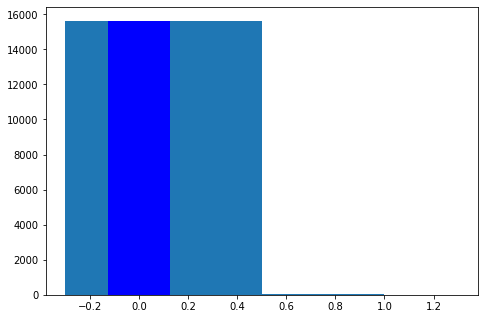

In [45]:
#source: https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
import matplotlib.pyplot as plt
left = [1, 2, 3, 4, 5,6,7,8,9,10]

x_label = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

plt.bar(left, count_grouped, tick_label = x_label,
            width = 0.8, color = ['red', 'yellow', 'green', 'blue', 'cyan', 'red', 'yellow', 'green', 'blue', 'cyan'])

plt.xlabel('Similarity score', fontsize=20)
plt.ylabel('Documents', fontsize=20)

Text(0, 0.5, 'Documents')

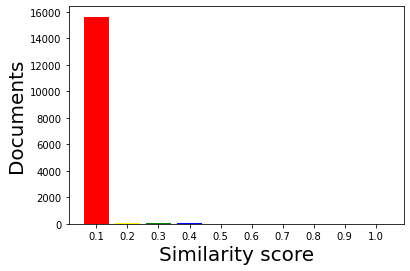